In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import random
from scipy.interpolate import interpn
from scipy.spatial import cKDTree
import nbimporter
import subprocess

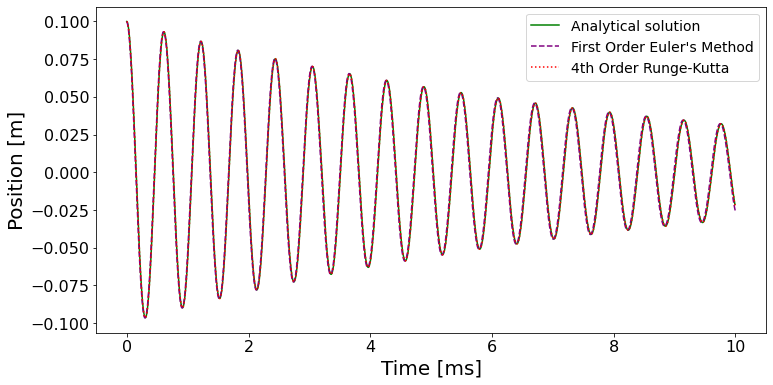

Cesium


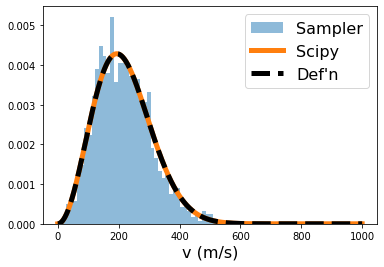

Sodium


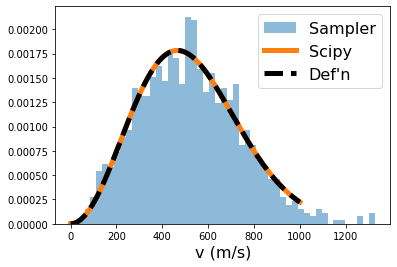

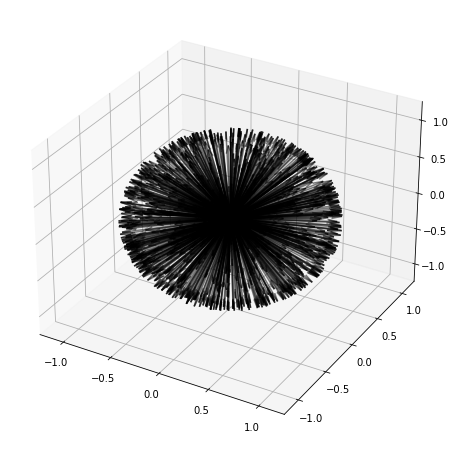

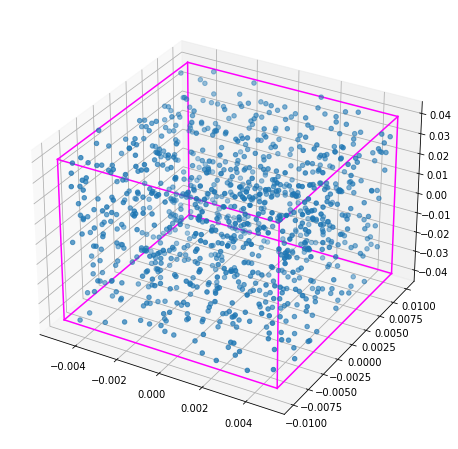

None


In [23]:
# Import B-field functions
%run CoilCreator.ipynb
# Import simulation functions
%run UpgradedMOTSIM.ipynb

# Constants of Parameter Search

In [33]:
# Physical Constants
hbar = 1.055 * 10**(-34) # Js, reduced Planck's constant
light_c = 2.998 * 10**(8) # m/s
BohrMag = 9.27401008 * 10**(-24) # A m^2

##########
# SET UP #
##########

NiGroup = True
Sodium = False

EasyMode = False # Overrides NiGroup

##################
# CHOOSE SPECIES #
##################

# Cesium Specifics
mass = 2.20694695 * 10**(-25) # kg 
gamma = 2*np.pi*5.22 * 10**(6) # Hz, natural line width of Cs D2 transition. Steck.
omega_D2 = 2*np.pi* 351.72571859 * 10**(12) # Hz. Steck p. 15: https://steck.us/alkalidata/cesiumnumbers.1.6.pdf
gF = 1
det_x = -1.9*gamma 
det_y = -1.9*gamma  
det_push = -1.9*gamma
det_counter = 0 # this is not used.


if Sodium:
    # Sodium Specifics
    mass = 3.817541 * 10**(-26) # kg
    gamma = 2*np.pi* 9.79 * 10**(6) # Hz, natural linewidth of Na D2 transition. 
    omega_D2 = 2*np.pi* 508.8487162 * 10**(12) # Hz. Steck p. 18: https://steck.us/alkalidata/sodiumnumbers.pdf
    gF = 1
    det_x = -1.0*gamma 
    det_y = -1.0*gamma  
    det_push = -1.0*gamma
    det_counter = 0 # this is not used.
    
#################
# CHOOSE CONFIG #
#################

# Will Group (for validation)
tube_diam = 1.5 * 10**(-3) # meters, equal to 5mm, differential pumping tube diameter
tube_length = 20 * 10**(-3) # meters, equal to 50mm, differential pumping tube length
x_len = 0.04 #m
y_len = 0.04 #m
z_len = 0.1 # m
long_cooling_waist = 0.034 # m. 
short_cooling_waist_x = 0.008 # m.
short_cooling_waist_y = 0.008 # m. 
push_waist = 2.2 * 10**(-3) # m. Equal to 2.2 mm. Circularly symmetric.
dist_2D_3D = .61 #m
ycenter = -0.003 # m
captureVelocity = 40 # m/s
captureRadius = 0.006 # m
    
if NiGroup == True:
    # Apparatus (NaCs 2.0)
    tube_diam = 4.6 * 10**(-3) # meters, equal to 5mm, differential pumping tube diameter
    tube_length = 100 * 10**(-3) # meters, equal to 50mm, differential pumping tube length
    gap_length = .01 # meters, equal to 1 cm, gap between end of 2D MOT cell and tube entrance.

    # Cell dimensions. NaCs 2.0.
    x_len = 0.01 # m
    y_len = 0.02 # m
    z_len = 0.08 # m

    # Beams. NaCs 2.0.
    long_cooling_waist = 30 * 10**(-3) # m. 
    short_cooling_waist_x = 0.004 # m.
    short_cooling_waist_y = 0.008 # m. 
    push_waist = 2.3 * 10**(-3) # m. Equal to 4.6 mm. Circularly symmetric.

    # Distance between 2D and 3D MOT
    dist_2D_3D = .59 # m
    
    # 3D MOT details 
    ycenter = -0.003 # m, center of 3D MOT (relative to y-position of diff pump tube)
    captureVelocity = 40 # m/s
    captureRadius = 0.0035 # m

    
# EASY MODE:
if EasyMode:
    tube_diam = 0.01 # meters, equal to 5mm, differential pumping tube diameter
    tube_length = 0.1 # meters, equal to 50mm, differential pumping tube length
    x_len = 0.04 #m
    y_len = 0.04 #m
    z_len = 0.1 # m
    long_cooling_waist = 0.034 # m. 
    short_cooling_waist_x = 0.008 # m.
    short_cooling_waist_y = 0.008 # m. 
    push_waist = 2.2 * 10**(-3) # m. Equal to 2.2 mm. Circularly symmetric.
    dist_2D_3D = 0.2 #m
    ycenter = 0 # m
    captureVelocity = 100 # m/s
    captureRadius = 0.05 # m
    
    

# Calculation of I_{sat}
I_sat = (hbar * omega_D2**3 * gamma)/(12*np.pi*light_c**2)
print(I_sat)
coolings0 = 5.1
CoolingPower_x = (coolings0 * I_sat)*(np.pi * long_cooling_waist * short_cooling_waist_x)/2
CoolingPower_y = (coolings0 * I_sat)*(np.pi * long_cooling_waist * short_cooling_waist_y)/2
print(CoolingPower_x, CoolingPower_y)

print("\n Run parameters. \n")
if Sodium:
    print("Species = Sodium")
else:
    print("Species = Cesium")
    
if EasyMode:
    print("Easy mode activated")
elif NiGroup:
    print("Ni Group activated")
else:
    print("Will Group activated")

11.022000771175032
0.01059575081507886 0.02119150163015772

 Run parameters. 

Species = Cesium
Ni Group activated


# Parameter Search Protocol

/Users/ChristianHaroldNunez/opt/anaconda3/envs/p37/lib/python3.7/site-packages/magpylib/_src/display/traces_utility.py:95: RuntimeWarning: invalid value encountered in true_divide
  nvec = np.array(vec) / norm
/Users/ChristianHaroldNunez/opt/anaconda3/envs/p37/lib/python3.7/site-packages/magpylib/_src/display/traces_utility.py:382: RuntimeWarning: All-NaN slice encountered
  np.nanmin(np.array(t[k], dtype=float)),
/Users/ChristianHaroldNunez/opt/anaconda3/envs/p37/lib/python3.7/site-packages/magpylib/_src/display/traces_utility.py:383: RuntimeWarning: All-NaN slice encountered
  np.nanmax(np.array(t[k], dtype=float)),


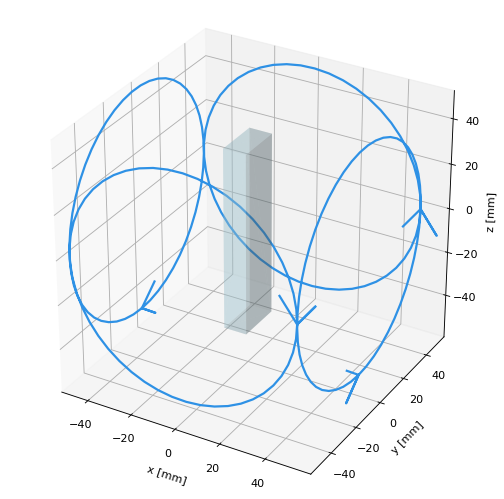

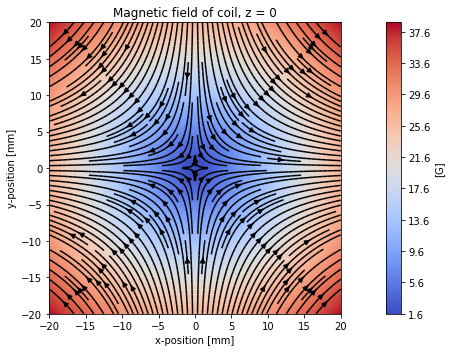

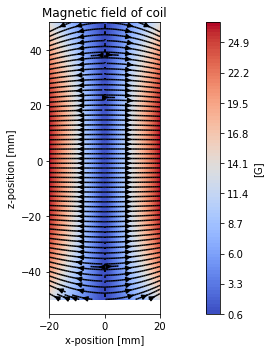

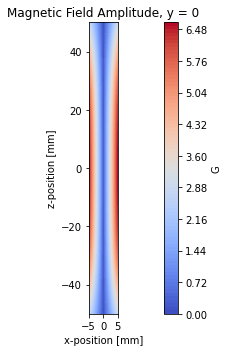

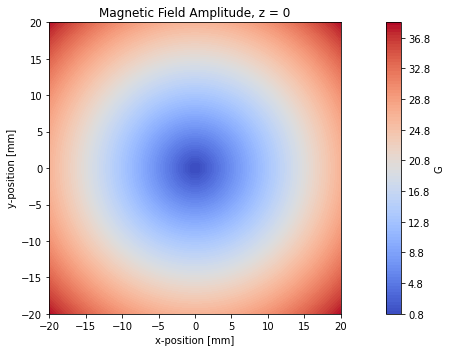

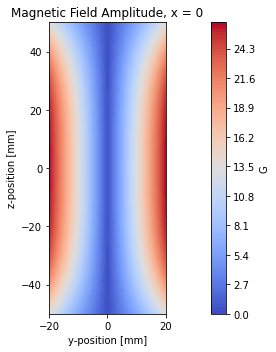

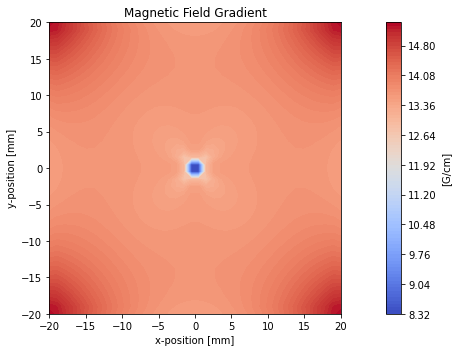

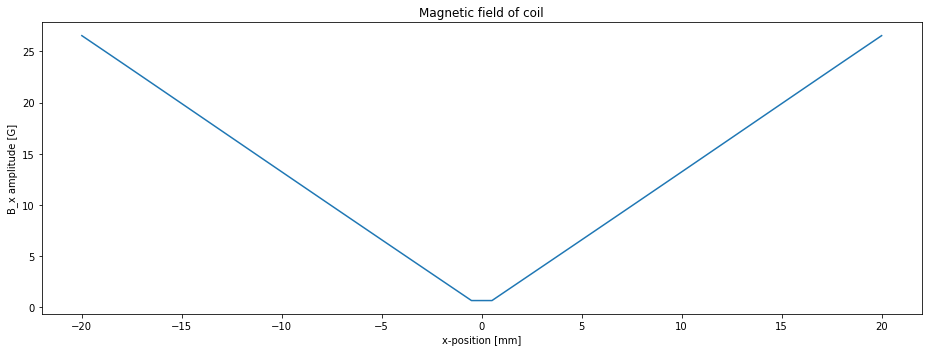

In [7]:
# Generate quadcoil for the run.
quadcoil = makeQuadCoil(winds = 10, dist = 50, diam = 100, curr = 330, width = 1, anti = -1)
collection = makeQuadCoil(winds = 10, dist = 50, diam = 100, curr = 330, width = 1, anti = -1)
cell = magpy.magnet.Cuboid(magnetization=(0,0,0), dimension=(1000*x_len, 1000*y_len, 1000*z_len), style={'color':"lightblue", 'opacity':0.25})
quadcoil.add(cell)
quadcoil.show()
describeCoil(quadcoil)

cell_x = 1000 * x_len #mm
cell_y = 1000 * y_len #mm
cell_z = 1000 * z_len #mm
def plot_mag_field_xy(coil1, z=0):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    yts = np.linspace(-1*cell_y/2, 1*cell_y/2, 40)
    xts = np.linspace(-1*cell_y/2, 1*cell_y/2, 40)
    grid = np.array([[(x,y,z) for x in xts] for y in yts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) * 10
    
    cp = axs.contourf(
        grid[:,:,0], grid[:,:,1], Bamp,
        levels=100,
        cmap='coolwarm',
    )
    axs.streamplot(
        grid[:,:,0], grid[:,:,1], B[:,:,0], B[:,:,1],
        density=2,
        color='black',
    )
    axs.set(
        title='Magnetic field of coil, z = '+str(z)+" mm",
        xlabel='x-position [mm]',
        ylabel='y-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='[G]')
    plt.tight_layout()
    
    
    # Plotting cell on heatmap:
    plt.plot([-cell_x/2, cell_x/2], [cell_y/2, cell_y/2], '-k')
    plt.plot([-cell_x/2, cell_x/2], [-cell_y/2, -cell_y/2], '-k')
    plt.plot([cell_x/2, cell_x/2], [cell_y/2, -cell_y/2], '-k')
    plt.plot([-cell_x/2, -cell_x/2], [cell_y/2, -cell_y/2], '-k')
    
    plt.show()


plot_mag_amp_line(quadcoil, 0)
#plot_mag_amp_line(quadcoil, 10)
#plot_mag_amp_line(quadcoil, 20)
#plot_mag_amp_line(quadcoil, 30)
#plot_mag_field_xy(quadcoil,z=0)
#plot_mag_field_xy(quadcoil,z=10)
#plot_mag_field_xy(quadcoil,z=20)
#plot_mag_field_xy(quadcoil,z=30)

In [8]:
# Generate B-field grid
tree, Bfields = buildBfieldGrid(collection, grid_spacing = 1 * 10**(-4))

B-field Grid shape:  100 x 200 x 800
Step 10 / 100 done. | Total time elapsed = 2.728 seconds
Step 20 / 100 done. | Total time elapsed = 5.488 seconds
Step 30 / 100 done. | Total time elapsed = 8.089 seconds
Step 40 / 100 done. | Total time elapsed = 10.913 seconds
Step 50 / 100 done. | Total time elapsed = 13.527 seconds
Step 60 / 100 done. | Total time elapsed = 15.978 seconds
Step 70 / 100 done. | Total time elapsed = 18.71 seconds
Step 80 / 100 done. | Total time elapsed = 22.996 seconds
Step 90 / 100 done. | Total time elapsed = 27.493 seconds
Step 100 / 100 done. | Total time elapsed = 30.779 seconds
magpylib is calculating B-field on the grid...
B-field calculated on the grid in 5.648  minutes


In [18]:
# Store the will group stuff:
willTree = tree
willBfields = Bfields

In [68]:
niTree = tree
niBfields = Bfields

In [78]:
tree = niTree
Bfields = niBfields

In [9]:
# This new sim has redefined "success" -- now, a success is a capture.
Bfields

array([[-0.44121457,  0.89196898, -0.10770145],
       [-0.44262397,  0.8948862 , -0.10738484],
       [-0.44402936,  0.89779438, -0.10706549],
       ...,
       [ 0.44402936, -0.89779438,  0.10706549],
       [ 0.44262397, -0.8948862 ,  0.10738484],
       [ 0.44121457, -0.89196898,  0.10770145]])

Starting sim for s0_cooling = 23 , s0_push = 0.5
Simulating the trajectories of 500000 atoms...
Done with run  0  | Total time elapsed = 0.001 minutes


mkdir: GapCesium/Cesium_v1: No such file or directory


Tube exit, no capture at n =  1310
Capture at n =  1809  |  Total captures =  1
Tube exit, no capture at n =  2036
Tube exit, no capture at n =  3640
Done with run  5000  | Total time elapsed = 0.471 minutes
Tube exit, no capture at n =  6385
Capture at n =  6795  |  Total captures =  2
Tube exit, no capture at n =  6957
Tube exit, no capture at n =  7999
Tube exit, no capture at n =  8689
Tube exit, no capture at n =  9780
Done with run  10000  | Total time elapsed = 1.048 minutes
Tube exit, no capture at n =  10473
Capture at n =  11095  |  Total captures =  3
Tube exit, no capture at n =  11909
Tube exit, no capture at n =  12917
Tube exit, no capture at n =  13005
Done with run  15000  | Total time elapsed = 1.462 minutes
Capture at n =  18028  |  Total captures =  4
Capture at n =  19225  |  Total captures =  5
Tube exit, no capture at n =  19770
Done with run  20000  | Total time elapsed = 1.807 minutes
Capture at n =  21894  |  Total captures =  6
Tube exit, no capture at n =  2

Tube exit, no capture at n =  160496
Tube exit, no capture at n =  161150
Tube exit, no capture at n =  162855
Tube exit, no capture at n =  164593
Done with run  165000  | Total time elapsed = 10.488 minutes
Tube exit, no capture at n =  165469
Tube exit, no capture at n =  166532
Tube exit, no capture at n =  166703
Capture at n =  168112  |  Total captures =  33
Tube exit, no capture at n =  169279
Done with run  170000  | Total time elapsed = 10.749 minutes
Capture at n =  170649  |  Total captures =  34
Tube exit, no capture at n =  170883
Capture at n =  172186  |  Total captures =  35
Tube exit, no capture at n =  174128
Tube exit, no capture at n =  174498
Done with run  175000  | Total time elapsed = 11.012 minutes
Tube exit, no capture at n =  176581
Tube exit, no capture at n =  176937
Tube exit, no capture at n =  177933
Capture at n =  177948  |  Total captures =  36
Done with run  180000  | Total time elapsed = 11.278 minutes
Tube exit, no capture at n =  181523
Capture a

Capture at n =  318777  |  Total captures =  51
Tube exit, no capture at n =  319144
Done with run  320000  | Total time elapsed = 18.807 minutes
Tube exit, no capture at n =  320317
Tube exit, no capture at n =  320777
Capture at n =  321147  |  Total captures =  52
Tube exit, no capture at n =  322497
Done with run  325000  | Total time elapsed = 19.042 minutes
Capture at n =  327063  |  Total captures =  53
Tube exit, no capture at n =  328139
Capture at n =  328840  |  Total captures =  54
Tube exit, no capture at n =  329066
Done with run  330000  | Total time elapsed = 19.279 minutes
Capture at n =  330693  |  Total captures =  55
Tube exit, no capture at n =  332179
Tube exit, no capture at n =  333723
Tube exit, no capture at n =  333896
Tube exit, no capture at n =  334666
Done with run  335000  | Total time elapsed = 19.537 minutes
Tube exit, no capture at n =  336107
Tube exit, no capture at n =  337397
Capture at n =  337866  |  Total captures =  56
Capture at n =  339559  

Capture at n =  470807  |  Total captures =  81
Tube exit, no capture at n =  471787
Tube exit, no capture at n =  472610
Tube exit, no capture at n =  474244
Tube exit, no capture at n =  474855
Done with run  475000  | Total time elapsed = 27.731 minutes
Tube exit, no capture at n =  475187
Tube exit, no capture at n =  475250
Tube exit, no capture at n =  475314
Tube exit, no capture at n =  475544
Tube exit, no capture at n =  476838
Tube exit, no capture at n =  477568
Tube exit, no capture at n =  478475
Tube exit, no capture at n =  479196
Capture at n =  479771  |  Total captures =  82
Done with run  480000  | Total time elapsed = 28.075 minutes
Capture at n =  482812  |  Total captures =  83
Tube exit, no capture at n =  483046
Tube exit, no capture at n =  483321
Tube exit, no capture at n =  483368
Capture at n =  484827  |  Total captures =  84
Done with run  485000  | Total time elapsed = 28.335 minutes
Tube exit, no capture at n =  485481
Tube exit, no capture at n =  485

FileNotFoundError: [Errno 2] No such file or directory: 'GapCesium/Cesium_v1/s0cooling_23_push_0.5_ycenter_-0.003/Tube-Exit-Non-captured-Trajectories_velocityhistograms.png'

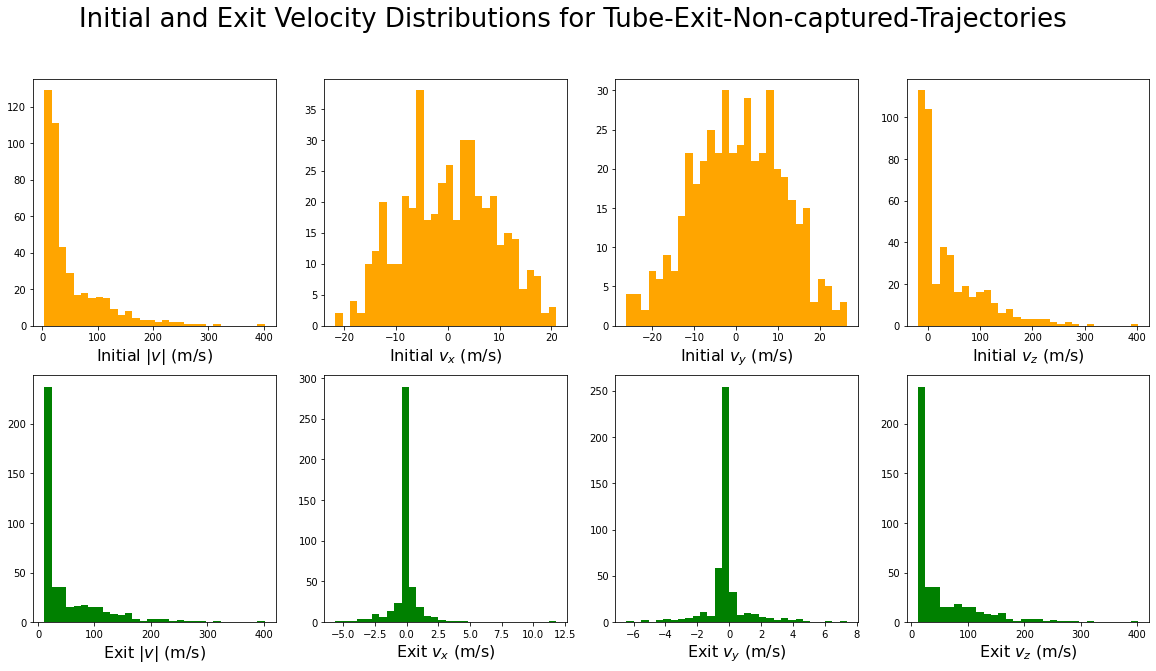

In [35]:
# Let's do a search over push beam intensities.
foldername="GapCesium/Cesium_v1/"
#foldername="TestCaptureStates_v11/"
subprocess.Popen("mkdir " + foldername, stdout=subprocess.PIPE, shell=True)
s0_push_range = [0.5, 3] #np.linspace(0, 6, num=13) #in s0 = I/I_sat units.
s0_cooling_range = [23] #[23, 20, 15, 5, 0]
ycenter_range = [-0.003] #np.linspace(-0.006, -0.001, num=6)
N_sim = 500000

# For results: alpha = captures/N_sim
successes_rec = []
capture_efficiencies = []
evxs = [] 
evys = [] 
evzs = [] 


for s0_cooling in s0_cooling_range:
    for s0_push in s0_push_range:
        for ycenter in ycenter_range:
            subfoldername = foldername+"s0cooling_"+str(s0_cooling)+"_push_"+str(s0_push)+"_ycenter_"+str(ycenter)+"/"
            subprocess.Popen("mkdir " + subfoldername, stdout=subprocess.PIPE, shell=True)
            print("Starting sim for s0_cooling =", s0_cooling, ", s0_push =",s0_push)
            # Tracking through 2D MOT chamber + tube
            pos_rec, vel_rec, times_rec, forces_rec, success_index, successes, tube_exit_index, tube_exits = startSim(tree, Bfields, N_sim, verbose=True)
            successes_rec.append(successes)


            # If any atoms made it through the tube:
            if tube_exits > 0:
                _, _, _ = printHistograms(subfoldername, vel_rec, tube_exit_index, "Tube-Exit-Non-captured-Trajectories")

            # If any atoms made it to the 3D MOT
            if successes > 0:
                #printTrajectory(foldername, pos_rec, vel_rec, forces_rec, times_rec, index=0)
                evxs, evys, evzs = printHistograms(subfoldername, vel_rec, success_index, "Captured-Trajectories")
                writeVelocities(subfoldername, evxs, evys, evzs)
                print3D(subfoldername, pos_rec, success_index)
                capture_efficiencies.append(successes/N_sim)
            else:
                capture_efficiencies.append(0)

            # Write summary
            writeSummary(subfoldername)
        
# Post-scan plotting;
plotCapEff_pushrange(foldername, s0_push_range, capture_efficiencies)
plotCapEff_coolrange(foldername, s0_cooling_range, capture_efficiencies)

In [15]:
def plotCapEff_pushrange(foldername, s0_push_range, capture_efficiencies):
    fig, ax = plt.subplots(figsize=(8,6))
    plt.scatter(s0_push_range, capture_efficiencies, c="k")
    plt.plot(s0_push_range, capture_efficiencies, "k--")
    plt.ylabel(r"$\alpha$ (capture efficiency)", fontsize=20)
    plt.xlabel(r"push beams $s_0 = I/I_{sat}$", fontsize=20)
    ax.tick_params(axis='both', labelsize=16)
    plt.savefig(foldername+"captureeffs_push")
    plt.show()
    
def plotCapEff_coolrange(foldername, s0_cooling_range, capture_efficiencies):
    fig, ax = plt.subplots(figsize=(8,6))
    plt.scatter(s0_cooling_range, capture_efficiencies, c="k")
    plt.plot(s0_cooling_range, capture_efficiencies, "k--")
    plt.ylabel(r"$\alpha$ (capture efficiency)", fontsize=20)
    plt.xlabel(r"cooling beams $s_0 = I/I_{sat}$", fontsize=20)
    ax.tick_params(axis='both', labelsize=16)
    plt.savefig(foldername+"captureeffs_cool")
    plt.show()

#plotCapEff_pushrange("DiffPumpSolution/", s0_push_range, capture_efficiencies)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


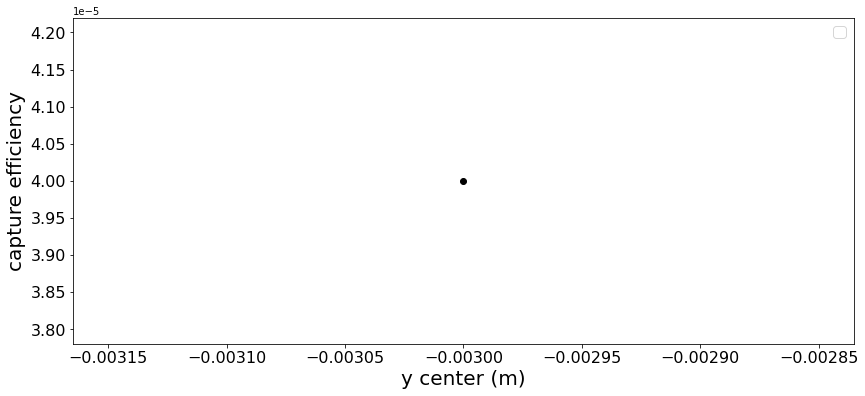

In [16]:
fig, ax = plt.subplots(figsize=(14,6))

a = np.array(successes_rec)/N_sim
#b = [a[i] for i in range(len(a)) if i % 2 == 0]
#b1 = [a[i] for i in range(len(a)) if i % 2 == 1]
#print(b)

plt.scatter(ycenter_range, a, c="k")
plt.plot(ycenter_range, a, "k--")


#plt.scatter(ycenter_range, a[6:], c="k")
#plt.plot(ycenter_range, a[6:], "k--", label="Push = 3s0", c="blue")

#plt.scatter(ycenter_range, push05, c="b")
#plt.plot(ycenter_range, push05, "b--", label="Push = 0.5s0")


plt.legend(fontsize=16)
plt.ylabel(r"capture efficiency", fontsize=20)
plt.xlabel(r"y center (m)", fontsize=20)
#plt.title("Cesium", fontsize=20)
ax.tick_params(axis='both', labelsize=16)

In [ ]:
# For push runs
fig, ax = plt.subplots(figsize=(14,6))

a = np.array(successes_rec)/N_sim

for i in range(len(s0_cooling_range)):
    ll = i*6
    uu = (i+1)*6
    xx = push_
    yy = a[ll:uu]
    plt.scatter(xx, yy)
    plt.plot(xx, yy, "--", label="Push = "+str(s0_push_range[i]))

plt.legend(fontsize=16)
plt.ylabel(r"capture efficiency", fontsize=20)
plt.xlabel(r"push", fontsize=20)
plt.title("Cesium", fontsize=20)
ax.tick_params(axis='both', labelsize=16)

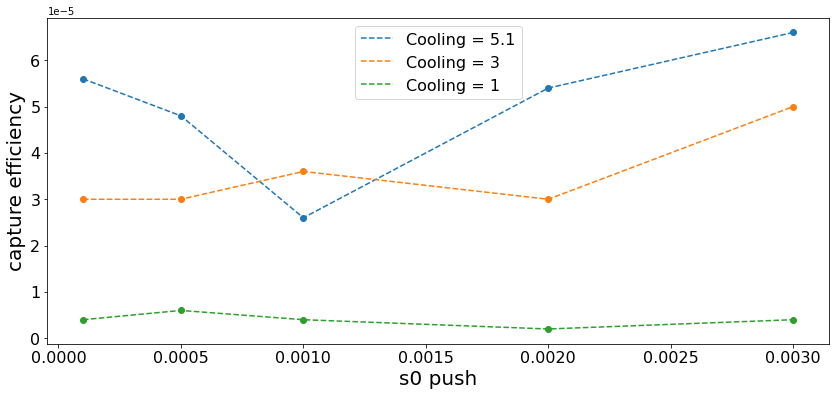

In [31]:
# For cooling runs


fig, ax = plt.subplots(figsize=(14,6))

a = np.array(successes_rec)/N_sim

for i in range(len(s0_cooling_range)):
    ll = i*5
    uu = (i+1)*5
    xx = s0_push_range
    yy = a[ll:uu]
    plt.scatter(xx, yy)
    plt.plot(xx, yy, "--", label="Cooling = "+str(s0_cooling_range[i]))

#plt.scatter(ycenter_range, a[6:], c="k")
#plt.plot(ycenter_range, a[6:], "k--", label="Push = 3s0", c="blue")

#plt.scatter(ycenter_range, push05, c="b")
#plt.plot(ycenter_range, push05, "b--", label="Push = 0.5s0")


plt.legend(fontsize=16)
plt.ylabel(r"capture efficiency", fontsize=20)
plt.xlabel(r"s0 push", fontsize=20)
#plt.title("Cesium", fontsize=20)
ax.tick_params(axis='both', labelsize=16)

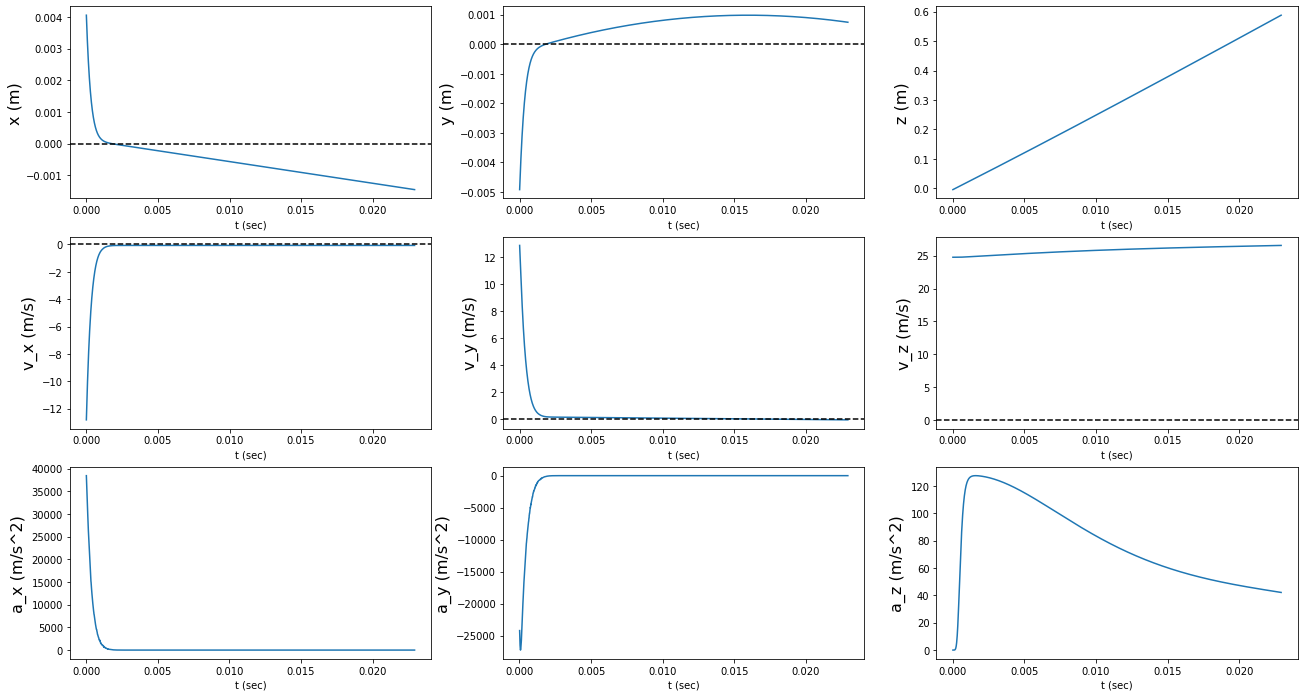

In [288]:
# for successes
printTrajectory(foldername, pos_rec, vel_rec, forces_rec, times_rec, mass, index=1)

TypeError: slice indices must be integers or None or have an __index__ method

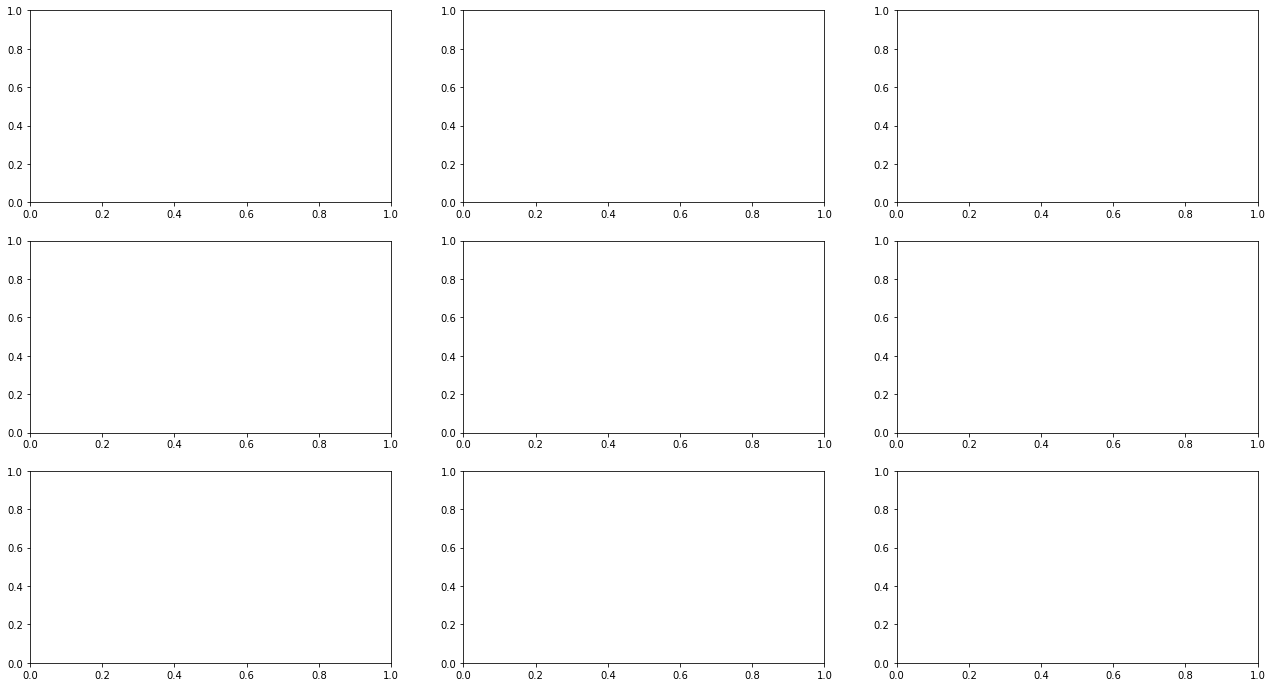

In [287]:
printTrajectory_aftertime(foldername, pos_rec, vel_rec, forces_rec, times_rec, mass, 0.025, index=1)

In [273]:
def printTrajectory_aftertime(foldername, pos_rec, vel_rec, forces_rec, times_rec, m, t, index=0):
    fig, ax = plt.subplots(3, 3, figsize=(22, 12))

    dt = 10 * 10**(-6)
    at = int(t/dt)
    
    sim = True
    if sim:
        nnn = success_index[index]
        pos = pos_rec[nnn]
        vel = vel_rec[nnn]
        forces = forces_rec[nnn]
        times = times_rec[nnn]

    # x-pos (TOP LEFT)
    ax[0,0].plot(times[at:], pos[:, 0][at:], label="RK4")
    ax[0,0].axhline(0, ls="--", c="black")
    ax[0,0].set_xlabel("t (sec)")
    ax[0,0].set_ylabel("x (m)", fontsize=16)

    # v_x (middle LEFT)
    ax[1,0].plot(times[at:], vel[:, 0][at:], label="RK4")
    ax[1,0].axhline(0, ls="--", c="black")
    ax[1,0].set_xlabel("t (sec)")
    ax[1,0].set_ylabel("v_x (m/s)", fontsize=16)

    # a_x (bottom LEFT)
    ax[2,0].plot(times[1:][at:], forces[:, 0][at:]/m, label="RK4")
    ax[2,0].set_xlabel("t (sec)")
    ax[2,0].set_ylabel("a_x (m/s^2)", fontsize=16)

    # y-pos (TOP CENTER)
    ax[0, 1].plot(times[at:], pos[:, 1][at:], label="RK4")
    ax[0, 1].axhline(0, ls="--", c="black")
    ax[0, 1].set_xlabel("t (sec)")
    ax[0, 1].set_ylabel("y (m)", fontsize=16)

    # v_y (BOTTOM CENTER)
    ax[1, 1].plot(times[at:], vel[:, 1][at:], label="RK4")
    ax[1, 1].axhline(0, ls="--", c="black")
    ax[1, 1].set_xlabel("t (sec)")
    ax[1, 1].set_ylabel("v_y (m/s)", fontsize=16)
    
    print(vel[:, 1][at:])

    # a_y (bottom middle)
    ax[2,1].plot(times[1:][at:], forces[:, 1][at:]/m, label="RK4")
    ax[2,1].set_xlabel("t (sec)")
    ax[2,1].set_ylabel("a_y (m/s^2)", fontsize=16)


    # z-pos (TOP RIGHT)
    ax[0, 2].plot(times[at:], pos[:, 2][at:], label="RK4")
    ax[0, 2].set_xlabel("t (sec)")
    ax[0, 2].set_ylabel("z (m)", fontsize=16)

    # v_z (BOTTOM RIGHT)
    ax[1, 2].plot(times[at:], vel[:, 2][at:], label="RK4")
    ax[1, 2].axhline(0, ls="--", c="black")
    ax[1, 2].set_xlabel("t (sec)")
    ax[1, 2].set_ylabel("v_z (m/s)", fontsize=16)

    # a_z (bottom middle)
    ax[2,2].plot(times[1:][at:], forces[:, 2][at:]/m, label="RK4")
    ax[2,2].set_xlabel("t (sec)")
    ax[2,2].set_ylabel("a_z (m/s^2)", fontsize=16)

In [61]:
writeSummary("Upgrades/Sodium_NewLogic/s0cooling_5.1_push_0/")

### Parameter search utilities

In [34]:
# Write run summary
def writeSummary(foldername):
    file = open(foldername+"SUMMARY.txt", "w+")
    file.write("===== RUN SUMMARY =====\n")
    if mass == 3.817541 * 10**(-26):
        file.write("Species: Sodium \n")
    else:
         file.write("Species: Cesium \n")
    file.write("N_sim: " + str(N_sim) + "\n")
    file.write("distance b/w 2D and 3D (m): "+str(dist_2D_3D)+ "\n")
    file.write("tube_diam (m): " + str(tube_diam) + "\n")
    file.write("tube_length (m): " +  str(tube_length) + "\n")
    file.write("gap_length (m): " +  str(gap_length) + "\n")
    file.write("cell (xlen, ylen, zlen) (m): ("+  str(x_len) + str(", ") + str(y_len) + ", " + str(z_len) + ") \n")
    file.write("long_cooling_waist (m):" + str(long_cooling_waist) + "\n")
    file.write("short_cooling_waist_x (m):" + str(short_cooling_waist_x) +"\n")
    file.write("short_cooling_waist_y (m):"+ str(short_cooling_waist_y) +"\n")
    file.write("push_waist (m:)"+  str(push_waist) +"\n")
    file.write("s0_push:"+  str(s0_push) + "\n")
    file.write("s0_cooling:" + str(s0_cooling) + "\n")
    file.write("det_x (Gamma):" +  str(det_x/gamma) + "\n")
    file.write("det_y (Gamma):" +  str(det_y/gamma) + "\n")
    file.write("det_push (Gamma): " +  str(det_push/gamma) + "\n")
    file.write("gF: "+str(gF))
    
    file.write("3D MOT set-up: \n")
    file.write("Assuming 3D MOT (cap radius (m), cap veloc (m/s)): (" + str(captureRadius) + ", " + str(captureVelocity) + ") \n")
    file.write("y-center: "+str(ycenter))


    file.write("\n===== CAPTURE STATS =====\n")
    file.write("Exited tube: "+ str(tube_exits) +  "\n")
    file.write("Captured by 3D MOT: " + str(successes) +  "\n")
    file.write("Capture efficiency (captures/N_sim): " + str(successes/N_sim) + "\n")
    
    
def writeVelocities(foldername, evxs, evys, evzs):
    file = open(foldername+"0_exitvelocities.txt", "w+")
    file.write("===== Raw exit velocities =====\n")
    file.write("evxs: " + str(evxs) + "\n")
    file.write("evxy: " + str(evys) + "\n")
    file.write("evzs: " + str(evzs) + "\n")
    
    file.write("===== Statistics (mean, std dev) =====\n")
    file.write("evxs: " + str(np.mean(evxs)) +" , " + str(np.std(evxs)) + "\n")
    file.write("evys: " + str(np.mean(evys)) +" , " + str(np.std(evys)) + "\n")
    file.write("evzs: " + str(np.mean(evzs)) +" , " + str(np.std(evzs)) + "\n")
    file.close()


    
def writeCaptureStats(foldername, captured_vxs, captured_vys, captured_vzs, tube_exit_vxs, tube_exit_vys, tube_exit_vzs):
    listt = [captured_vxs, captured_vys, captured_vzs, tube_exit_vxs, tube_exit_vys, tube_exit_vzs]
    labels = ["vx when captured", "vy when captured", "vz when captured", "captured atom vx out of tube", "captured atom vy out of tube", "captued atom vz out of tube"]
    
    file = open(foldername+"0_capturedexits_whencaptured.txt", "w+")

    for i in range(len(listt)):
        file.write("Label = "+labels[i])
        file.write("Mean = " + np.mean(listt[i]))
        file.write("Stdev = " + np.std(listt[i]))
        
        file.write("Raw data \n")
        file.write(listt[i])
    file.close()  
    

def printCaptureHistogram(foldername, evxs, evys, evzs, captured_vxs, captured_vys, captured_vzs, tube_exit_vxs, tube_exit_vys, tube_exit_vzs):
    # Plotting:
    fig, ax = plt.subplots(3,3, figsize=(20,20))
    #fig.suptitle("Capture Analysis.", fontsize=26)

    # First row: all tube-exit velocities 
    ax[0][0].hist(evxs, bins=30, color="orange")
    ax[0][0].set_xlabel(r"Exit $v_x$ (m/s) (Cap+Noncap)", fontsize=16)

    ax[0][1].hist(evys, bins=30, color="orange")
    ax[0][1].set_xlabel(r"Exit $v_y$ (m/s) (Cap+Noncap)", fontsize=16)

    ax[0][2].hist(evzs, bins=30, color="orange")
    ax[0][2].set_xlabel(r"Exit $v_z$ (m/s) (Cap+Noncap)", fontsize=16)
    
    # Second row: velocities of atoms out of the tube which are captured by the 3D MOT later.
    ax[1][0].hist(tube_exit_vxs, bins=30, color="blue")
    ax[1][0].set_xlabel(r"Exit $v_x$ (m/s) (Cap'd)", fontsize=16)

    ax[1][1].hist(tube_exit_vys, bins=30, color="blue")
    ax[1][1].set_xlabel(r"Exit $v_y$ (m/s) (Cap'd)", fontsize=16)

    ax[1][2].hist(tube_exit_vzs, bins=30, color="blue")
    ax[1][2].set_xlabel(r"Exit $v_z$ (m/s) (Cap'd)", fontsize=16)
    
    plt.savefig(foldername+"/capturedhistogram.png", bbox_inches="tight", facecolor="white")

    # Third row: velocities of atoms captued by 3D MOT, when captured by 3D MOT.
    ax[2][0].hist(captured_vxs, bins=30, color="green")
    ax[2][0].set_xlabel(r"$v_x$ (m/s) (when cap'd)", fontsize=16)

    ax[2][1].hist(captured_vys, bins=30, color="green")
    ax[2][1].set_xlabel(r"$v_y$ (m/s) (when cap'd)", fontsize=16)

    ax[2][2].hist(captured_vzs, bins=30, color="green")
    ax[2][2].set_xlabel(r"$v_z$ (m/s) (when cap'd)", fontsize=16)    


In [79]:
print(mass)

3.817541e-26


In [80]:
print(dist_2D_3D)

0.59


In [17]:
# Temp print trajceotry
def temp_printTrajectory(foldername, pos_rec, vel_rec, forces_rec, times_rec, index=0):
    fig, ax = plt.subplots(3, 3, figsize=(22, 12))
    
    nnn = index
    pos = pos_rec[nnn]
    vel = vel_rec[nnn]
    forces = forces_rec[nnn]
    times = times_rec[nnn]

    # x-pos (TOP LEFT)
    ax[0,0].plot(times, pos[:, 0], label="RK4")
    ax[0,0].axhline(0, ls="--", c="black")
    ax[0,0].set_xlabel("t (sec)")
    ax[0,0].set_ylabel("x (m)", fontsize=16)

    # v_x (middle LEFT)
    ax[1,0].plot(times, vel[:, 0], label="RK4")
    ax[1,0].axhline(0, ls="--", c="black")
    ax[1,0].set_xlabel("t (sec)")
    ax[1,0].set_ylabel("v_x (m/s)", fontsize=16)

    # F_x (bottom LEFT)
    ax[2,0].plot(times[1:], forces[:, 0], label="RK4")
    ax[2,0].set_xlabel("t (sec)")
    ax[2,0].set_ylabel("F_x (N)", fontsize=16)

    # y-pos (TOP CENTER)
    ax[0, 1].plot(times, pos[:, 1], label="RK4")
    ax[0, 1].axhline(0, ls="--", c="black")
    ax[0, 1].set_xlabel("t (sec)")
    ax[0, 1].set_ylabel("y (m)", fontsize=16)

    # v_y (BOTTOM CENTER)
    ax[1, 1].plot(times, vel[:, 1], label="RK4")
    ax[1, 1].axhline(0, ls="--", c="black")
    ax[1, 1].set_xlabel("t (sec)")
    ax[1, 1].set_ylabel("v_y (m/s)", fontsize=16)

    # F_y (bottom middle)
    ax[2,1].plot(times[1:], forces[:, 1], label="RK4")
    ax[2,1].set_xlabel("t (sec)")
    ax[2,1].set_ylabel("F_y (N)", fontsize=16)


    # z-pos (TOP RIGHT)
    ax[0, 2].plot(times, pos[:, 2], label="RK4")
    ax[0, 2].set_xlabel("t (sec)")
    ax[0, 2].set_ylabel("z (m)", fontsize=16)

    # v_z (BOTTOM RIGHT)
    ax[1, 2].plot(times, vel[:, 2], label="RK4")
    ax[1, 2].axhline(0, ls="--", c="black")
    ax[1, 2].set_xlabel("t (sec)")
    ax[1, 2].set_ylabel("v_z (m/s)", fontsize=16)

    # F_z (bottom middle)
    ax[2,2].plot(times[1:], forces[:, 2], label="RK4")
    ax[2,2].set_xlabel("t (sec)")
    ax[2,2].set_ylabel("F_z (N)", fontsize=16)

In [27]:
np.linspace(-0.01, 0.001, num=6)

array([-0.01  , -0.0078, -0.0056, -0.0034, -0.0012,  0.001 ])

In [39]:
np.linspace(0, 6, num=13)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ])